## 1. Importowanie danych

In [1]:
from utils.datahandler import DataHandler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
datahandler = DataHandler()

datahandler.load_data()

datahandler.prepare_data(ohe=True)
df = datahandler.get_data()
X_train, X_test, y_train, y_test = datahandler.get_data_split()

In [3]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,-0.328602,4.185032,2.706375,9.813449e-01,4.418381,-1.189510,1.189990,-0.01399,-0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,2.184951,-0.766774,False
1,0.786070,-0.328602,-0.238947,2.121559,-4.487029e-16,4.418381,0.840682,-0.840343,-0.01399,-0.723884,...,-0.065756,-1.157010,2.288955,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,False
2,1.626390,-0.328602,4.185032,-0.005028,4.592691e-01,4.418381,-1.189510,1.189990,-0.01399,-0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,False
3,0.255342,-0.328602,-0.238947,1.437358,7.012067e-01,4.418381,0.840682,-0.840343,-0.01399,-0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,-0.457676,-0.766774,True
4,1.582163,3.043196,-0.238947,1.501184,-6.230830e-01,4.418381,0.840682,-0.840343,-0.01399,-0.723884,...,-0.065756,-1.157010,2.288955,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.626390,3.043196,-0.238947,-0.494658,-4.487029e-16,-0.226327,0.840682,-0.840343,-0.01399,-0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,-0.457676,1.304165,False
5106,1.670617,-0.328602,-0.238947,0.420775,1.414286e+00,-0.226327,0.840682,-0.840343,-0.01399,-0.723884,...,-0.065756,-1.157010,2.288955,-0.394112,-0.984080,0.984080,-0.658011,-0.457676,1.304165,False
5107,-0.363842,-0.328602,-0.238947,-0.511443,2.173316e-01,-0.226327,0.840682,-0.840343,-0.01399,-0.723884,...,-0.065756,-1.157010,2.288955,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,False
5108,0.343796,-0.328602,-0.238947,1.328257,-4.193461e-01,-0.226327,-1.189510,1.189990,-0.01399,-0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,1.016178,-1.016178,-0.658011,2.184951,-0.766774,False


In [4]:
j = 200 #Rekords o tym indeksie jest w późniejszej części kodu analizowany

X_test.iloc[j, :]

age                               1.007207
hypertension                     -0.328602
heart_disease                    -0.238947
avg_glucose_level                -0.690554
bmi                               0.472003
stroke                           -0.226327
gender_Female                     0.840682
gender_Male                      -0.840343
gender_Other                     -0.013990
ever_married_No                  -0.723884
ever_married_Yes                  0.723884
work_type_Govt_job               -0.384111
work_type_Never_worked           -0.065756
work_type_Private                -1.157010
work_type_Self-employed           2.288955
work_type_children               -0.394112
Residence_type_Rural              1.016178
Residence_type_Urban             -1.016178
smoking_status_Unknown           -0.658011
smoking_status_formerly smoked   -0.457676
smoking_status_never smoked       1.304165
Name: 4678, dtype: float64

## 2. RandomForest Classifier

### 2.1. Lime

In [5]:
from lime import lime_tabular

In [6]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [7]:
print(f"F1 Score {f1_score(y_test, y_pred)}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))

F1 Score 1.0
Accuracy 1.0
[[850   0]
 [  0 172]]


In [8]:
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train.values, 
                                              feature_names=X_train.columns.values, 
                                              verbose=True,
                                              mode="regression")

In [9]:
exp = explainer.explain_instance(data_row=X_test.values[j], 
                                 predict_fn=rf.predict)

exp.show_in_notebook(show_table=True)

c:\Users\Stasiek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.08558905295359631
Prediction_local [0.23122662]
Right: False


### 2.2. SHAP

In [10]:
import shap

In [11]:
shap.initjs()

explainer = shap.Explainer(rf.predict, X_test)
shap_values = explainer(X_test)

PermutationExplainer explainer: 1023it [05:07,  3.26it/s]                          


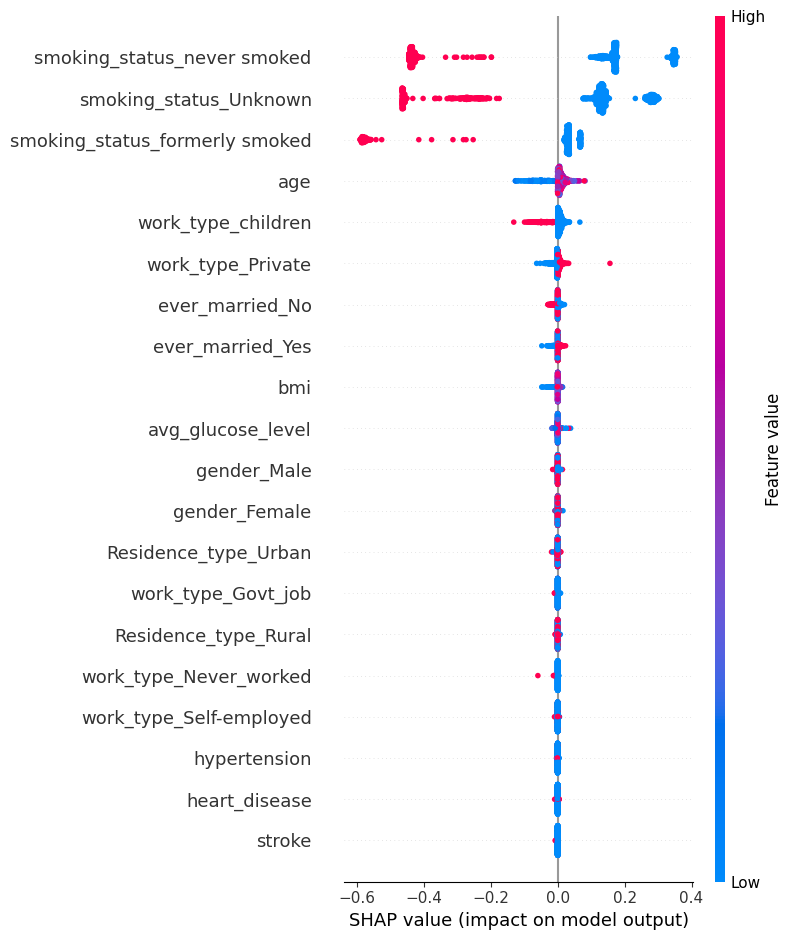

In [12]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

In [13]:
shap.plots.force(shap_values.base_values[j], 
                shap_values.values[j], 
                shap_values.data[j], 
                feature_names=X_test.columns)

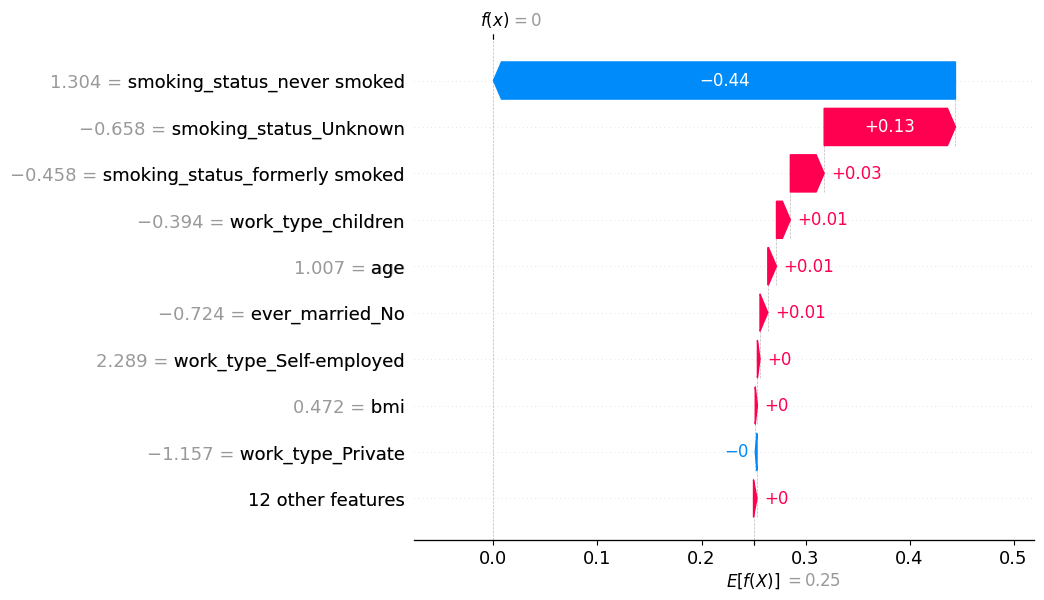

In [14]:
shap.plots.waterfall(shap_values[j])

### 2.3. Partial Dependance Plot

In [15]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

In [20]:
feature = 'age'

pdp_lines = partial_dependence(estimator=rf,
                               X=X_test,
                               features=[feature],
                               percentiles=(0, 1),
                               kind='average')

In [21]:
pdp_lines

{'average': array([[0.13716243, 0.13716243, 0.13716243, 0.13716243, 0.13716243,
         0.13716243, 0.13716243, 0.13716243, 0.13716243, 0.13716243,
         0.13716243, 0.13716243, 0.13716243, 0.13716243, 0.13716243,
         0.13716243, 0.13716243, 0.13716243, 0.13716243, 0.13716243,
         0.13716243, 0.13717221, 0.13717221, 0.13947162, 0.13885519,
         0.13886497, 0.13735812, 0.13277886, 0.13242661, 0.13782779,
         0.14975538, 0.15526419, 0.15847358, 0.16842466, 0.17046967,
         0.17205479, 0.17265166, 0.17453033, 0.17460861, 0.17522505,
         0.17728963, 0.17810176, 0.17662427, 0.17885519, 0.17820939,
         0.1790998 , 0.17606654, 0.17324853, 0.17363992, 0.17272994,
         0.1707045 , 0.17127202, 0.17141879, 0.17104697, 0.16973581,
         0.17049902, 0.17097847, 0.17134051, 0.17156556, 0.17137965,
         0.17138943, 0.17093933, 0.1708317 , 0.17088063, 0.16962818,
         0.16984344, 0.16979452, 0.17052838, 0.1702544 , 0.17110568,
         0.16844423, 0.

In [22]:
print(len(pdp_lines['average'][0]))
print(np.shape(pdp_lines['values']))
print(np.shape(pdp_lines['average']))

96
(1, 96)
(1, 96)


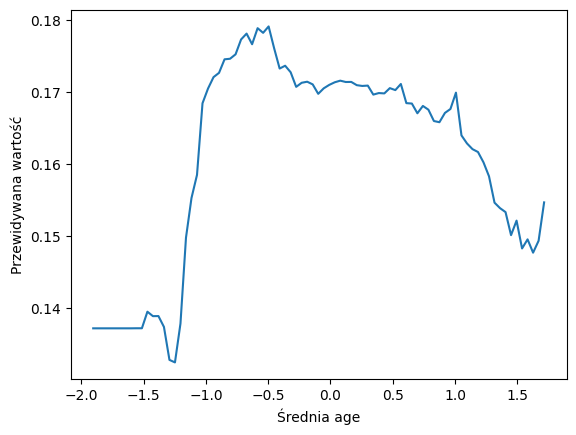

In [23]:
plt.plot(pdp_lines['values'][0], pdp_lines['average'][0])

plt.ylabel("Przewidywana wartość")
plt.xlabel(f"Średnia {feature}")

plt.show()

2D PDP

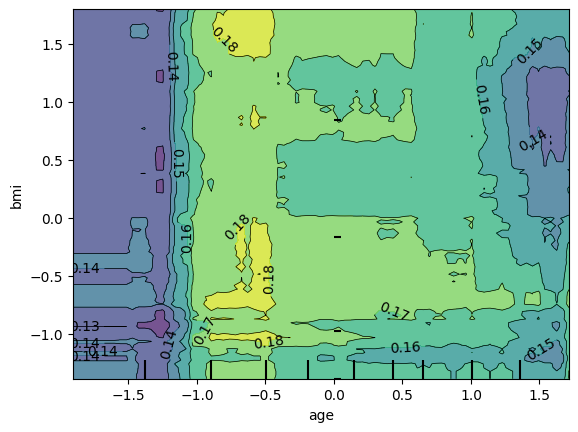

In [46]:
features = [('age', 'bmi')]

PartialDependenceDisplay.from_estimator(rf, X_test, features)

### 2.4. Individual Conditional Expectation

In [24]:
from sklearn.inspection import partial_dependence

In [25]:
pdp_lines = partial_dependence(estimator=rf,
                               X=X_test,
                               features=[feature],
                               percentiles=(0, 1),
                               kind='both')

In [30]:
pdp_lines['individual'][0]

array([[0.07, 0.07, 0.07, ..., 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, ..., 0.  , 0.  , 0.02],
       [0.04, 0.04, 0.04, ..., 0.07, 0.07, 0.09],
       ...,
       [0.03, 0.03, 0.03, ..., 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.02]])

In [31]:
#Wyśrodkowanie lini

for i in range(len(pdp_lines['individual'][0])):
    pdp_start = pdp_lines['individual'][0][i][0]
    pdp_lines['individual'][0][i] = pdp_lines['individual'][0][i] - pdp_start

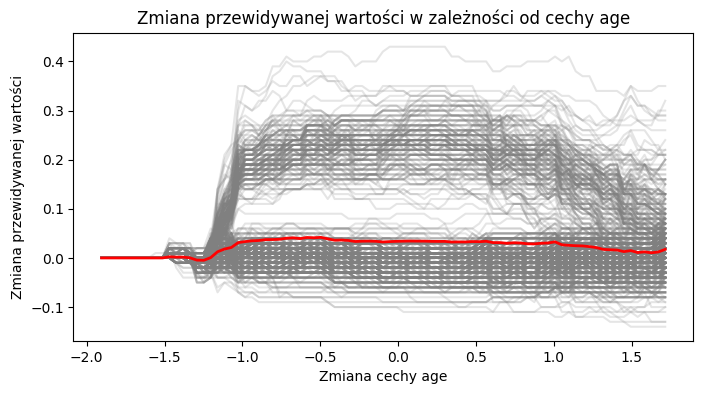

In [42]:
plt.figure(figsize=(8, 4))

for i in range(len(pdp_lines['individual'][0])):
    plt.plot(pdp_lines['values'][0],
             pdp_lines['individual'][0][i],
             color='gray',
             alpha=0.2)
    
pdp_avg = pdp_lines['average'][0] - pdp_lines['average'][0][0]
plt.plot(pdp_lines['values'][0], pdp_avg, linewidth=2, color='red')

plt.title("Zmiana przewidywanej wartości w zależności od cechy age")
plt.ylabel("Zmiana przewidywanej wartości")
plt.xlabel("Zmiana cechy age")

plt.show()